In [51]:
### https://www.kaggle.com/akpflow/super-market-analysis

In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
import os
print(os.listdir("G:\Data Science projects\EDA_Projects\Supermarket\dataset"))

['supermarket_sales - Sheet1.csv']


In [54]:
sales = pd.read_csv('G:\Data Science projects\EDA_Projects\Supermarket\dataset/supermarket_sales - Sheet1.csv')

In [55]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [56]:
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [57]:
### By inspection, the 'Date' datatype is an object, we need to change it to datetime
from pandas import to_datetime
sales['Date'] =to_datetime(sales['Date'])

In [58]:
sales['Date'].dtype

dtype('<M8[ns]')

In [59]:
sales['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [60]:
type(sales['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [61]:
sales['Date'][0]

Timestamp('2019-01-05 00:00:00')

In [62]:
### lets fetch some derived attributes from Date as day,month,year

def fetch_att(x):
    day=x.day
    month=x.month
    year=x.year
    return pd.Series([day,month,year])

In [63]:
sales[['day','month','year']]=sales['Date'].apply(fetch_att)

In [64]:
#### alternative is , 

## just define functions for each of the task..
## using lambda
## using date-time module

'''
def day(x):
    return x.day


def month(x):
    return x.month
def year(x):
    return x.year
def hour(x):
    return x.hour


### lets fetch some derived attributes from Date as day,month,year
sales['day'] = sales['Date'].apply(day)
sales['month'] = sales['Date'].apply(month)
sales['year'] = sales['Date'].apply(year)(lambda x:x.day)
sales['month'] = sales['Date'].apply(lambda x:x.month)
sales['year'] = sales['Date'].apply(lambda x:x.year)

'''



### lets fetch some derived attributes from Date as day,month,year

'''sales['day'] = (sales['Date']).dt.day
sales['month'] = (sales['Date']).dt.month
sales['year'] = (sales['Date']).dt.year
sales['Hour'] = (sales['Time']).dt.hour 
'''


"\ndef day(x):\n    return x.day\n\n\ndef month(x):\n    return x.month\ndef year(x):\n    return x.year\ndef hour(x):\n    return x.hour\n\n\n### lets fetch some derived attributes from Date as day,month,year\nsales['day'] = sales['Date'].apply(day)\nsales['month'] = sales['Date'].apply(month)\nsales['year'] = sales['Date'].apply(year)\n\n"

In [67]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019


In [68]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'day', 'month', 'year'],
      dtype='object')

In [69]:
sales['Time'].dtype

dtype('O')

In [70]:
## similarly u have to convert Time into date-time format

sales['Time'] =to_datetime(sales['Time'])


In [71]:
sales['Time'].dtype

dtype('<M8[ns]')

In [74]:
sales['Time']

0     2021-09-30 13:08:00
1     2021-09-30 10:29:00
2     2021-09-30 13:23:00
3     2021-09-30 20:33:00
4     2021-09-30 10:37:00
              ...        
995   2021-09-30 13:46:00
996   2021-09-30 17:16:00
997   2021-09-30 13:22:00
998   2021-09-30 15:33:00
999   2021-09-30 13:28:00
Name: Time, Length: 1000, dtype: datetime64[ns]

In [81]:
sales['hour'] = sales['Time'].apply(lambda x:x.hour)

In [ ]:
### Alternative..

### using own function
### using date-time 
### using split(this will not be handy if we have different types of format of time in same feature..)

'''

def hour(x):
    return x.hour

sales['hour'] = sales['Time'].apply(hour)
sales['hour'] = sales['Time'].dt.hour

## access hour for the first row..
int('2021-09-30 13:08:00'.split(' ')[1].split(':')[0])

'''

In [82]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2021-09-30 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2021-09-30 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2021-09-30 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2021-09-30 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2021-09-30 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10


In [83]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000
day,1000.0,15.256000,8.693563e+00,1.000000,8.000000,15.000000,23.000000,31.000000
month,1000.0,1.993000,8.352536e-01,1.000000,1.000000,2.000000,3.000000,3.000000


<AxesSubplot:>

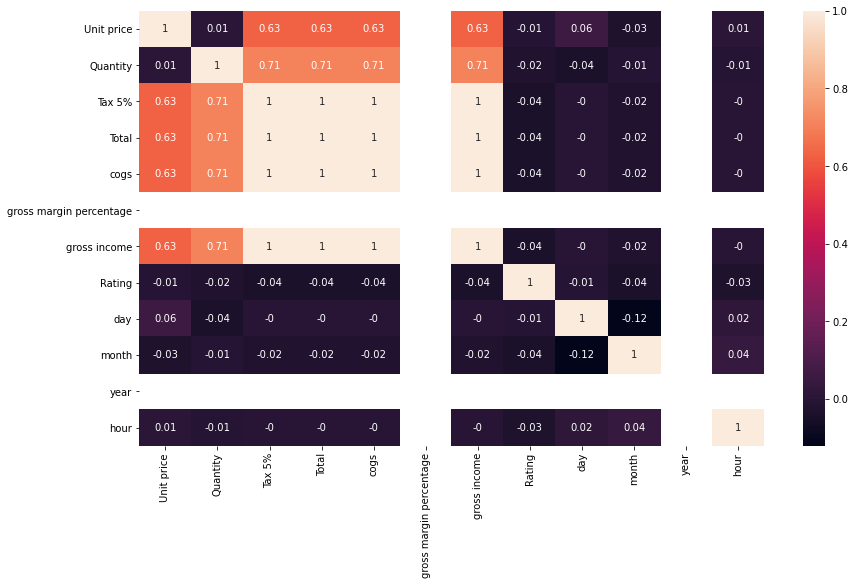

In [84]:
plt.figure(figsize=(14,8))
sns.heatmap(np.round(sales.corr(),2),annot=True)


In [ ]:
### The best correlated are Tax 5%, Total, Gross Income and cogs i.e Cost of Goods sold with a correlation of 1.

### Also, the above mentioned all has a good correlation of 0.71 with Quantity

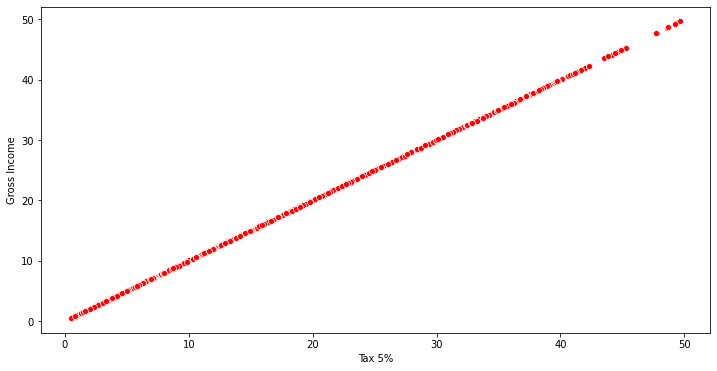

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Tax 5%',y='gross income',data=sales,color='Red')
plt.xlabel('Tax 5%')
plt.ylabel('Gross Income')
plt.show()

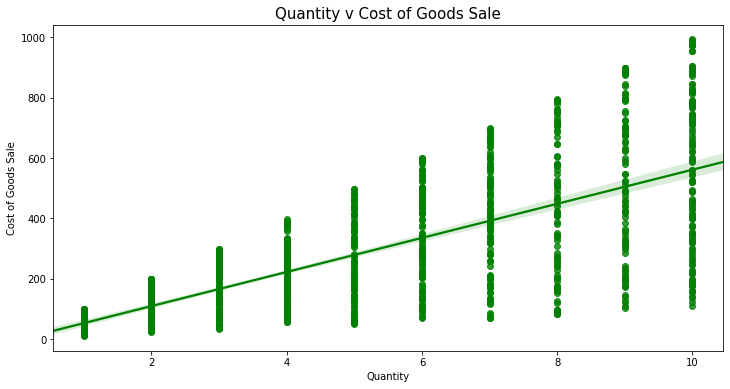

In [28]:
plt.figure(figsize=(12,6))
sns.regplot(x='Quantity',y='cogs',data=sales,color='green')
plt.xlabel('Quantity')
plt.ylabel('Cost of Goods Sale')
plt.title('Quantity v Cost of Goods Sale',fontsize=15)
plt.show()

### which city has more Gross Income

In [17]:
### median makes sense if we have outliers in data  , bcz median will not get deviated..

sales.groupby(['City'])['gross income'].median()

City
Mandalay     12.04200
Naypyitaw    12.92475
Yangon       11.46800
Name: gross income, dtype: float64

In [ ]:
### if we have more cities , it will be good if we perform Geographical analysis to get a cleat cut

### if we have more cities , its good to use geopy module to come up with geographical co-ordinates

### To find Mean Rating

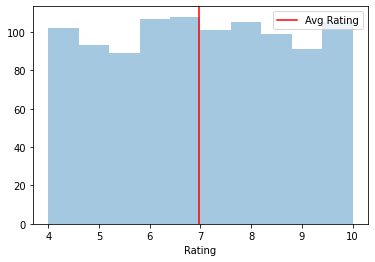

In [29]:
plt.figure()
sns.distplot(sales['Rating'],kde=False)

##plt.axis_vertical_line
plt.axvline(x=np.mean(sales['Rating']),c='red',label='Avg Rating')
plt.legend()



In [85]:
cat_columns = [col for col in sales.columns if sales[col].dtype == "object"]
## cat_columns = [col for col in sales.columns if sales[col].dtype == "O"]

## sales.select_dtypes(include='O').columns

In [86]:
cat_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [16]:
for col in cat_columns:
    print('{} has unique values: {} '.format(col,sales[col].nunique()))

Invoice ID has unique values: 1000 
Branch has unique values: 3 
City has unique values: 3 
Customer type has unique values: 2 
Gender has unique values: 2 
Product line has unique values: 6 
Payment has unique values: 3 


In [ ]:
##sns.countplot()

In [17]:
def return_countplot(column,hue_name=None):
    return sns.countplot(x=column, data =sales,hue=hue_name)

In [18]:
def return_boxplot(x_column,y_column):
    sns.boxplot(x=x_column, y = y_column ,data =sales)

In [19]:
def return_lineplot(x_column, y_column):
    sns.lineplot(x=x_column,  y = y_column,data =sales)

In [20]:
def return_rel_plot(x_col, y_col, col_name=None, row_name=None, rel_type=None, hue_name=None, style_name=None):
    return sns.relplot(x=x_col, y =y_col, col=col_name , row=row_name, kind=rel_type, hue=hue_name, style=style_name, data =sales)

###  Find distribution of each & every branch

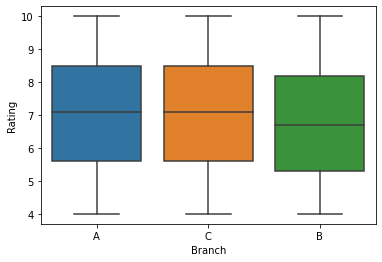

In [21]:
return_boxplot('Branch','Rating')

In [22]:
### Branch B has the lowest rating among all the branches

#### Sales by the hour Analysis

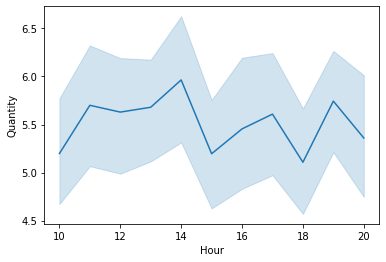

In [23]:
return_lineplot('Hour','Quantity')

In [24]:
#### Conclusion--->>  Most of the item were sold around 14:00 hrs local time

### how much sales occurs in each & every branch with respect to each & every month

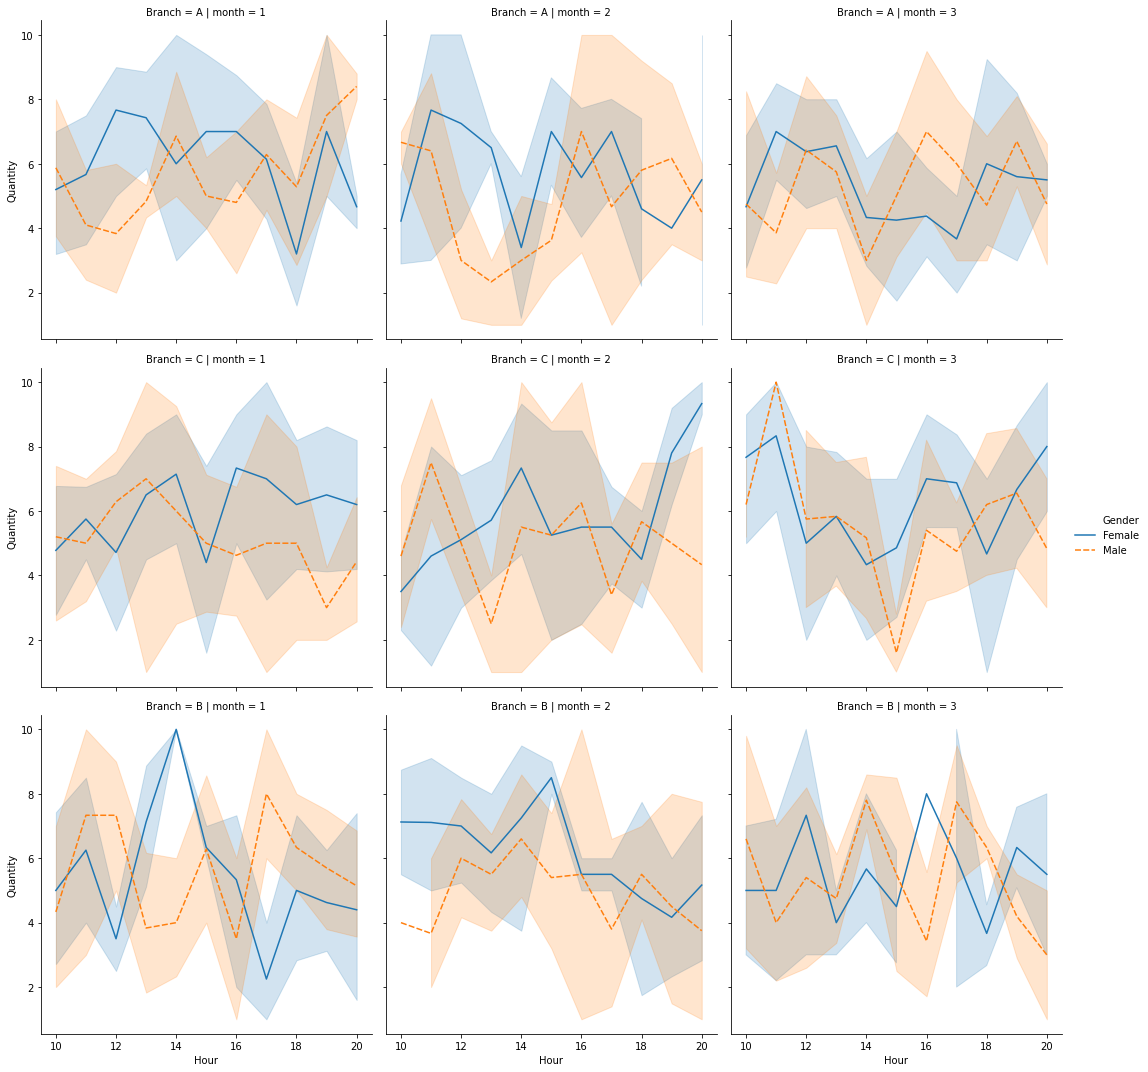

In [25]:
return_rel_plot(x_col="Hour",y_col='Quantity', col_name='month' ,row_name='Branch', rel_type="line", hue_name="Gender", style_name="Gender")

### Analysing branch's sales per hour in a monthly fashion

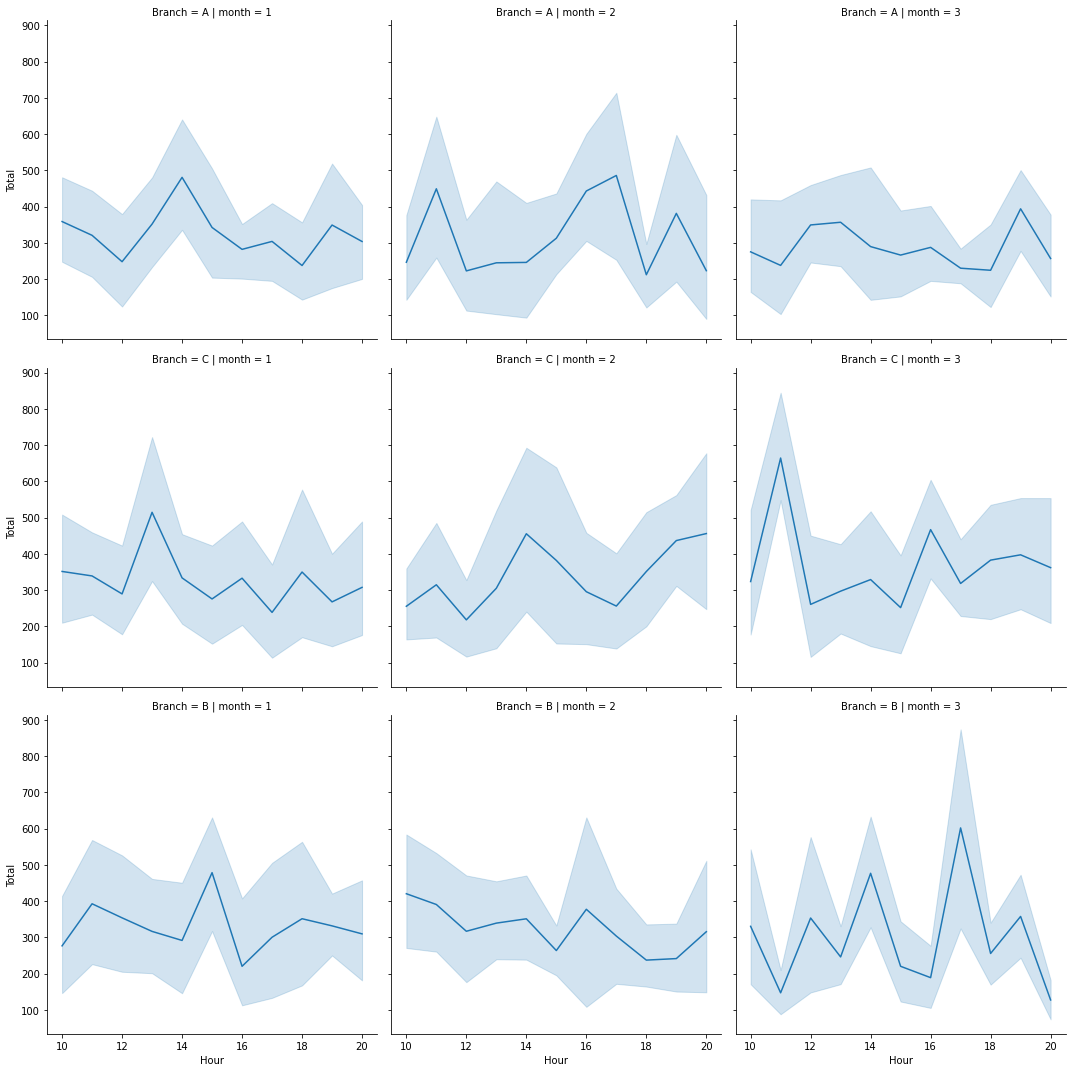

In [26]:
return_rel_plot(x_col="Hour",  y_col= 'Total', col_name= 'month' , row_name= 'Branch', rel_type="line")

### Let's see when customers buy certain products in the various branches.

<Figure size 1440x864 with 0 Axes>

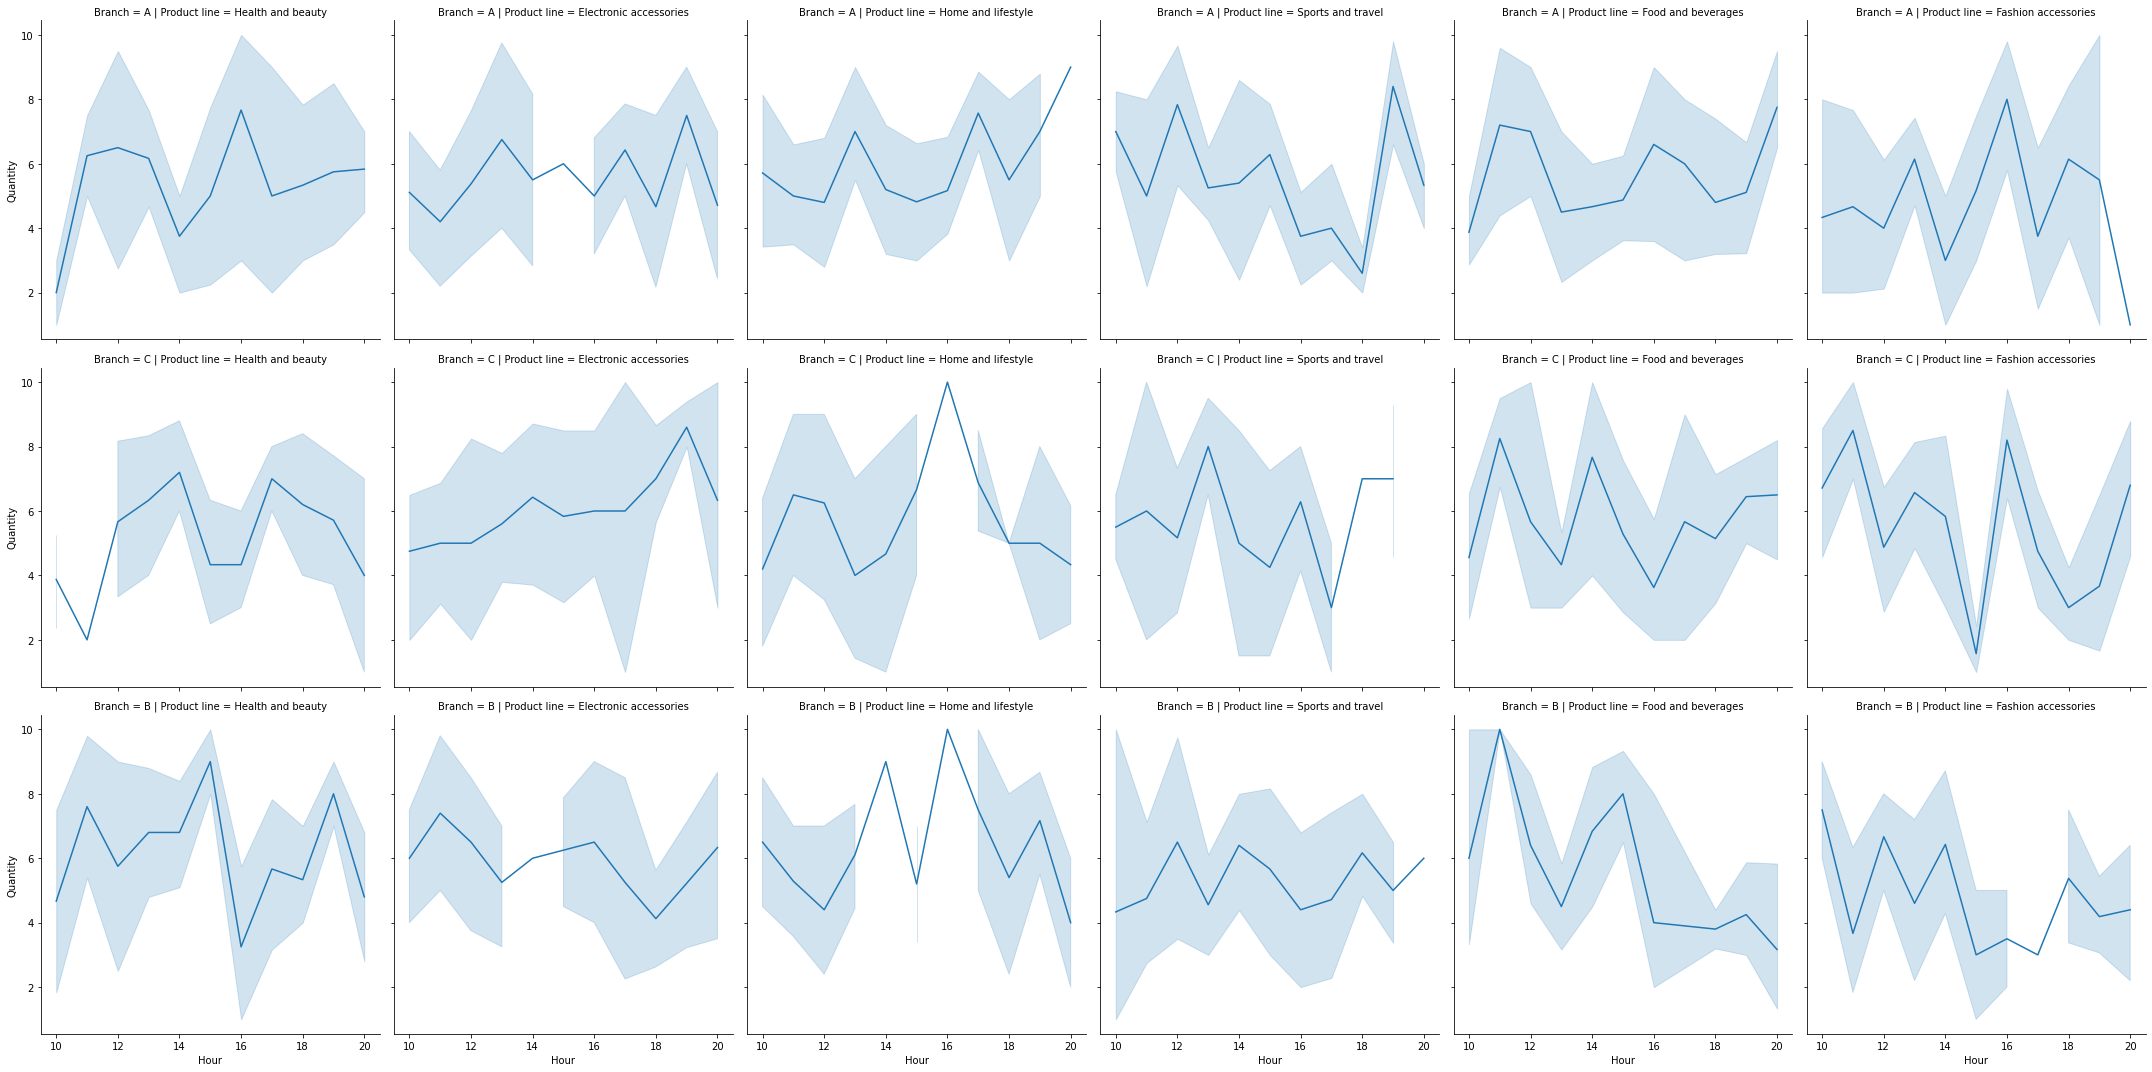

In [27]:
plt.figure(figsize=(20,12))
return_rel_plot(x_col="Hour",  y_col= 'Quantity', col_name= 'Product line' , row_name= 'Branch', rel_type="line")

In [28]:
### Conclusion-->> From the above plots, we can see that food and beverages sales usually high in all three branches at evening especially around 19:00

In [29]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2021-01-27 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2021-01-27 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2021-01-27 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2021-01-27 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2021-01-27 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10


### Lets perform Product Analysis

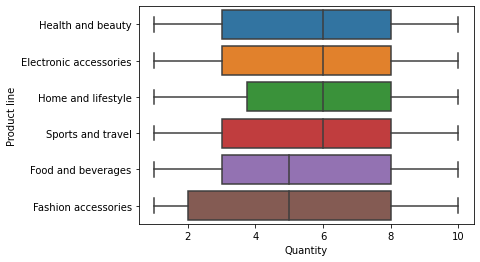

In [30]:
## Quantity distribution of each & every product
return_boxplot('Quantity','Product line')

In [31]:
##### Conclusion-->> From the above visual, Health and Beauty,Electronic accessories, Home and lifestyle, 
####              Sports and travel have a better average quantity sales that food and beverages as well as Fashion accessories.

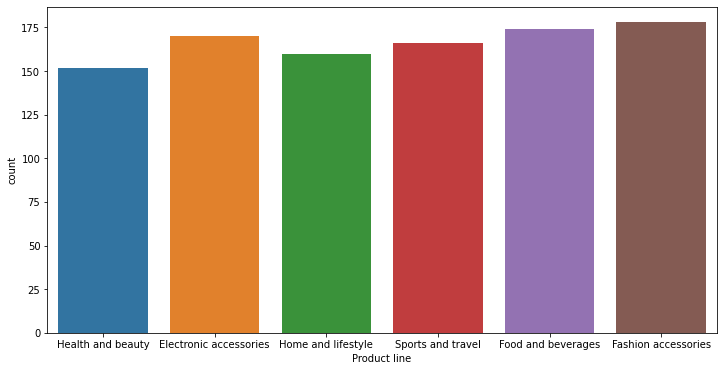

In [32]:
plt.figure(figsize=(12,6))
return_countplot('Product line')

In [33]:
### From the above,Fashion Accessories is the highest while Health and beauty is the lowest

In [34]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2021-01-27 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2021-01-27 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2021-01-27 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2021-01-27 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2021-01-27 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10


### relationship between Gross_income & Product_line

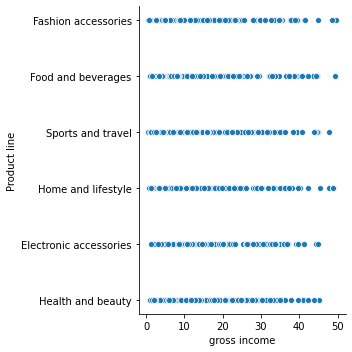

In [35]:

return_rel_plot('gross income','Product line',rel_type='scatter')

In [36]:
#### Conclusion-->> persons who are going to purchase Fashion Accessories seems to have max. gross income

### Let see how customers make payment in this business

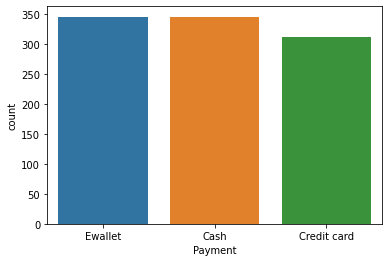

In [37]:
return_countplot("Payment")

In [38]:
#### Most of the customers pay through the Ewallet and Cash Payment while under 30 percent of them pay with their credit card.
#### We would also like to see this payment type distribution across all the branches

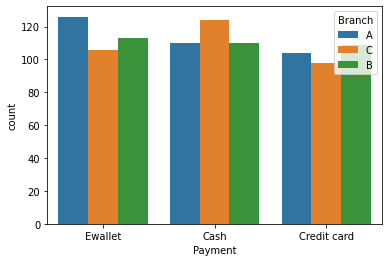

In [39]:
return_countplot("Payment","Branch")

#### Customer Analysis

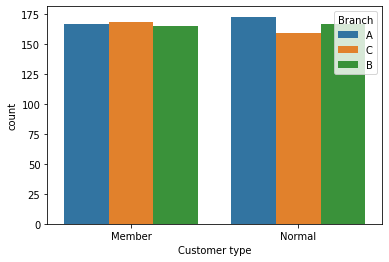

In [40]:
return_countplot("Customer type",'Branch')

#### Does customer type influences the sales?

In [34]:
sales.groupby(['Customer type']).agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


In [36]:
type(sales.groupby(['Customer type']).agg({'Total':'sum'}))

pandas.core.frame.DataFrame

In [41]:
### alternate of above one
sales.groupby(['Customer type'])['Total'].sum()

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

In [35]:
type(sales.groupby(['Customer type'])['Total'].sum())

pandas.core.series.Series

### Do the customer type influence customer rating? Let's find out

Text(0.5, 1.0, 'Customer Type')

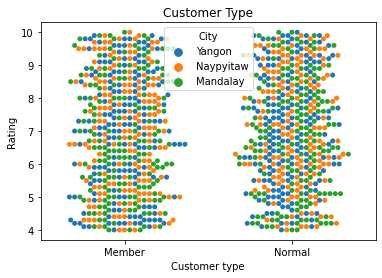

In [42]:
sns.swarmplot(x="Customer type",  y = "Rating",  hue = "City", data =sales).set_title("Customer Type") 

In [43]:
from wordcloud import WordCloud

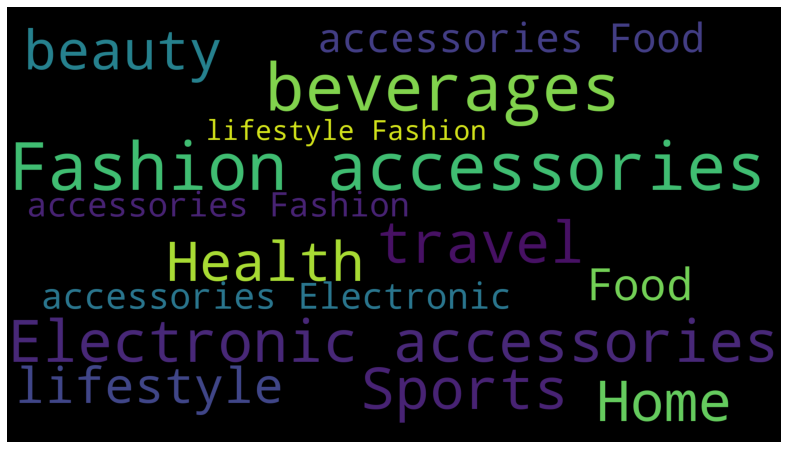

In [45]:
plt.subplots(figsize=(15,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(sales["Product line"]))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()